In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
book=pd.read_csv("D:\\DataSet\\insurance\\day.csv")

In [55]:
book.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [56]:
#as the data is of two years thats why instant dteday column has no important
book.drop(["instant","dteday"],axis=1,inplace=True)

In [57]:
book.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<AxesSubplot:>

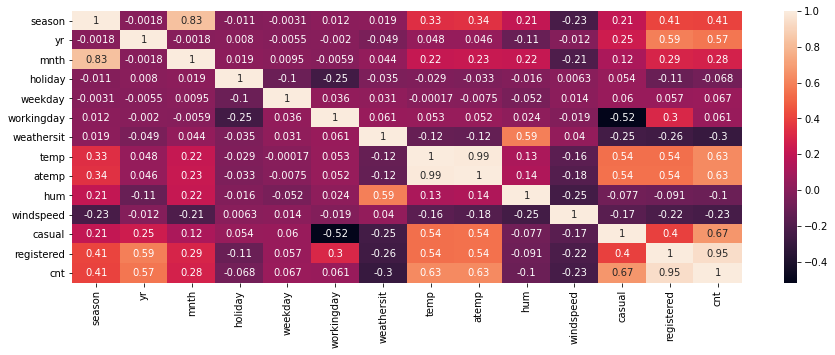

In [58]:
plt.figure(figsize=(15,5))
sns.heatmap(book.corr(),annot=True)

In [59]:
#temp and atemp has .99 correlation
book=sm.add_constant(book)
book.drop("atemp",axis=1,inplace=True)

In [62]:
Y=book.iloc[:,-1]
X=book.iloc[:,:-1]
ols_model = sm.OLS(Y,X).fit()

In [63]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.246e+30
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:53:17   Log-Likelihood:                 17263.
No. Observations:                 731   AIC:                        -3.450e+04
Df Residuals:                     718   BIC:                        -3.444e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.633e-12   3.72e-12     -1.247      0.213   -1.19e-11    2.66e-12
season     -3.428e-12   9.14e-13     -3.752      0.000   -5.22e-12   -1.63e-12
yr          2.777e-11   1.66e-12     16.775      0.000    2.45e-11     3.1e-11
mnth        4.263e-13   2.66e-13      1.602      0.110    -9.6e-14    9.49e-13
holiday    -1.421e-13   3.14e-12     -0.045      0.964   -6.31e-12    6.02e-12
weekday    -4.192e-13   2.56e-13     -1.639      0.102   -9.21e-13    8.29e-14
workingday  2.842e-14    1.9e-12      0.015      0.988    -3.7e-12    3.76e-12
weathersit  1.052e-12   1.27e-12      0.827      0.409   -1.45e-12    3.55e-12
temp       -2.018e-12   4.31e-12     -0.469      0.639   -1.05e-11    6.44e-12
hum         1.563e-12   4.89e-12      0.320      0.749   -8.04e-12    1.12e-11
windspeed  -2.274e-12   7.16e-12     -0.318      0.751   -1.63e-11    1.18e-11
casual         1.0000   1.37e-15   7.29e+14      0.000       1.000       1.000
registered     1.0000   7.84e-16   1.28e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     4036.192   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.939
Skew:                          -0.037   Prob(JB):                     1.61e-18
Kurtosis:                       1.362   Cond. No.                     6.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [65]:
model=LinearRegression().fit(X_train,y_train)

In [66]:
predictor=model.predict(X_test)

C:\Users\Rick\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

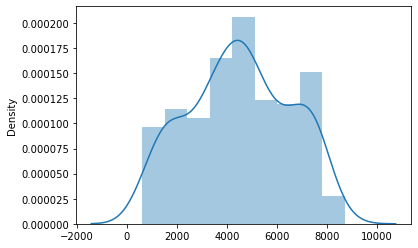

In [68]:
sns.distplot(x=predictor)

<AxesSubplot:ylabel='cnt'>

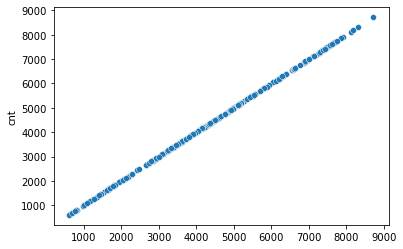

In [69]:
sns.scatterplot(x=predictor,y=y_test)